# Gated Recurrent Unit (GRU)

GRU is the younger sibling of the more popular Long Short-Term Memory (LSTM) network, and also a type of Recurrent Neural Network (RNN). Just like its sibling, GRUs are able to effectively retain long-term dependencies in sequential data. And additionally, they can address the “short-term memory” issue plaguing vanilla RNNs.

Considering the legacy of Recurrent architectures in sequence modelling and predictions, the GRU is on track to outshine its elder sibling due to its superior speed while achieving similar accuracy and effectiveness.

**Outline:**

In this project, I have developed GRU model and I'll walk through the concepts behind GRUs and compare the mechanisms of GRUs against LSTMs. I'll also explore the performance differences in these two RNN variants.

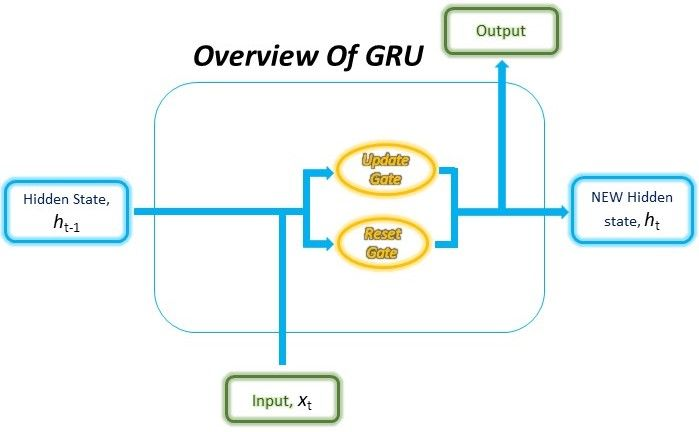


A Gated Recurrent Unit (GRU), as its name suggests, is a variant of the RNN architecture, and uses gating mechanisms to control and manage the flow of information between cells in the neural network.

# The structure of the GRU

The structure of the GRU allows it to adaptively capture dependencies from large sequences of data without discarding information from earlier parts of the sequence. This is achieved through its gating units, similar to the ones in LSTMs, which solve the vanishing/exploding gradient problem of traditional RNNs. These gates are responsible for regulating the information to be kept or discarded at each time step.

Other than its internal gating mechanisms, the GRU functions just like an RNN, where sequential input data is consumed by the GRU cell at each time step along with the memory, or otherwise known as the hidden state. The hidden state is then re-fed into the RNN cell together with the next input data in the sequence. This process continues like a relay system, producing the desired output.

              GRUs follow the same flow as the typical RNN

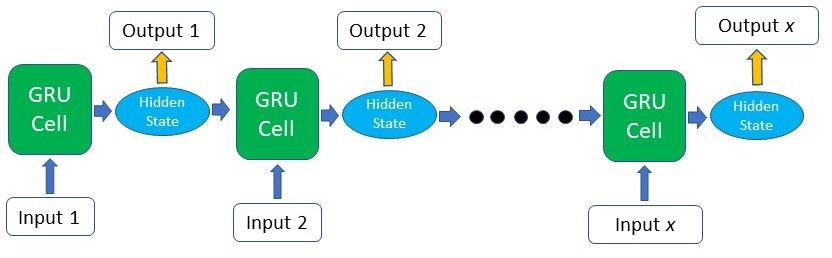

# Inner Workings of the GRU

*   The ability of the GRU to hold on to long-term dependencies or memory stems from the computations within the GRU cell to produce the hidden state.

*   While LSTMs have two different states passed between the cells — the cell state and hidden state, which carry the long and short-term memory, respectively — GRUs only have one hidden state transferred between time steps.


* This hidden state is able to hold both the long-term and short-term dependencies at the same time due to the gating mechanisms and computations that the hidden state and input data go through.

                                GRU vs LSTM

  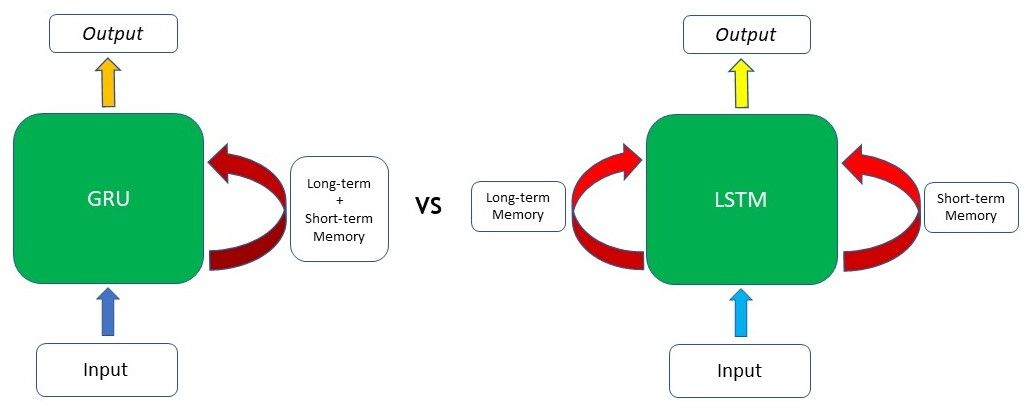

# Intuition of gates in GRU

The GRU cell contains only two gates: the Update gate & the Reset gate.

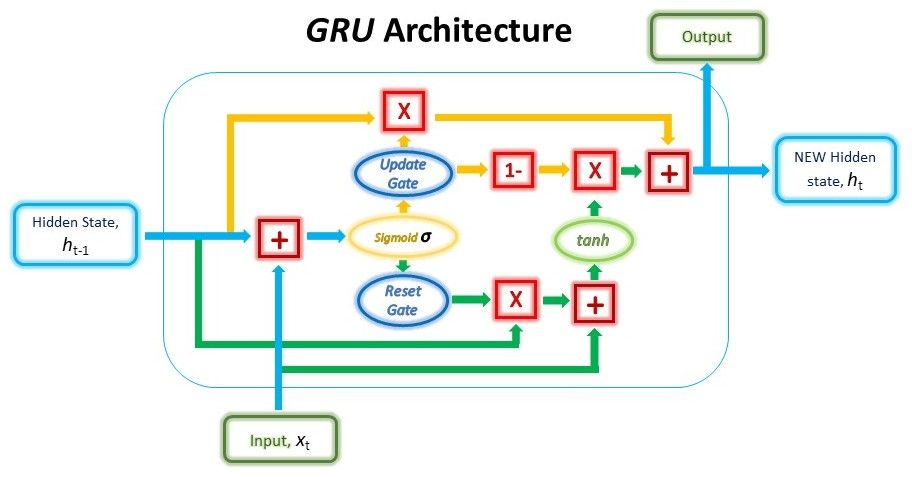

*   Just like the gates in LSTMs, these gates in the GRU are trained to selectively filter out any irrelevant information while keeping what’s useful.

*   These gates are essentially vectors containing values between 0 to 1 which will be multiplied with the input data and/or hidden state.

*    A 0 value in the gate vectors indicates that the corresponding data in the input or hidden state is unimportant and will, therefore, return as a zero.

*    On the other hand, a 1 value in the gate vector means that the corresponding data is important and will be used.

While the structure may look rather complicated due to the large number of connections, the mechanism behind it can be broken down into three main steps.

1.   Reset Gate: This gate is derived and calculated using both the hidden state from the previous time step and the input data at the current time step.

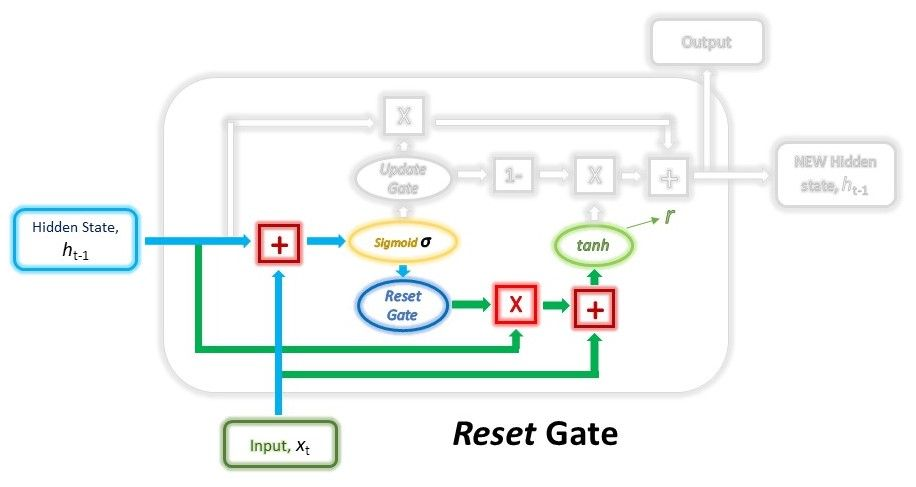

*   The reset gate is used to decide whether the previous cell state is important or not. Sometimes the reset gate is not used in simple GRU.

*   Mathematically, this is achieved by multiplying the previous hidden state and current input with their respective weights and summing them before passing the sum through a sigmoid function. The sigmoid function will transform the values to fall between 0 and 1, allowing the gate to filter between the less-important and more-important information in the subsequent steps.

* When the entire network is trained through back-propagation, the weights in the equation will be updated such that the vector will learn to retain only the useful features.
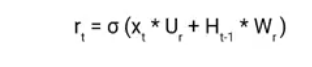

* The previous hidden state will first be multiplied by a trainable weight and will then undergo an element-wise multiplication (Hadamard product) with the reset vector. This operation will decide which information is to be kept from the previous time steps together with the new inputs. At the same time, the current input will also be multiplied by a trainable weight before being summed with the product of the reset vector and previous hidden state above. Lastly, a non-linear activation tanh function will be applied to the final result to obtain r in the equation below.


2.   Update Gate:

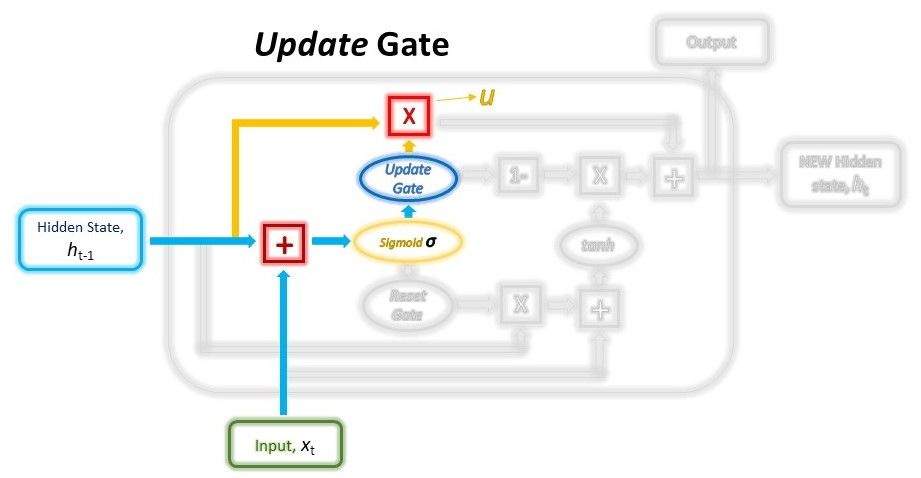


*   Update gate decides if the cell state should be updated with the candidate state(current activation value)or not. Just like the Reset gate, the gate is computed using the previous hidden state and current input data.


*   Both the Update and Reset gate vectors are created using the same formula, but,
*    the weights multiplied with the input and hidden state are unique to each gate, which means that  the final vectors for each gate are different.

* This allows the gates to serve their specific purposes.

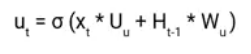

The Update vector will then undergo element-wise multiplication with the previous hidden state to obtain u in our equation below, which will be used to compute our final output later.

**purpose of the Update gate:**

The Update vector will also be used in another operation later when obtaining our final output. The purpose of the Update gate here is to help the model determine how much of the past information stored in the previous hidden state needs to be retained for the future.




3. Combining the outputs:

In the last step, we will be reusing the Update gate and obtaining the updated hidden state.

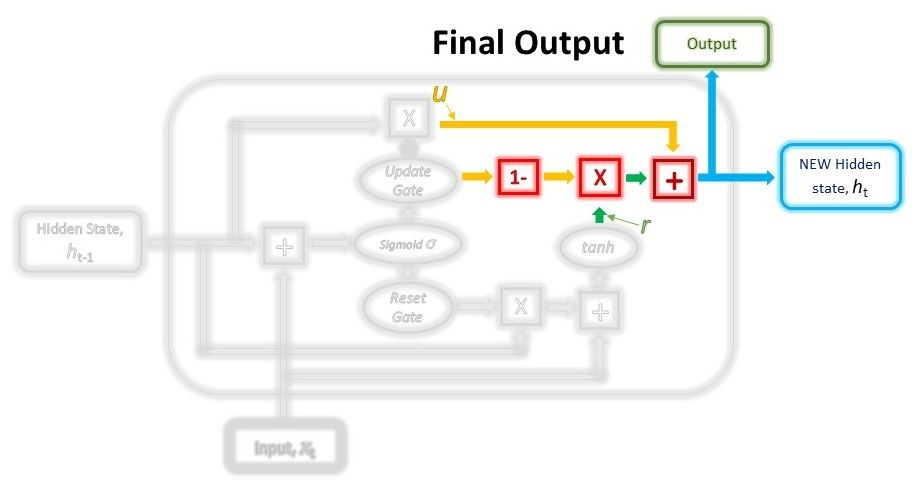

This time, we will be taking the element-wise inverse version of the same Update vector (1 - Update gate) and doing an element-wise multiplication with our output from the Reset gate, r. The purpose of this operation is for the Update gate to determine what portion of the new information should be stored in the hidden state.

Lastly, the result from the above operations will be summed with our output from the Update gate in the previous step, u. This will give us our new and updated hidden state.

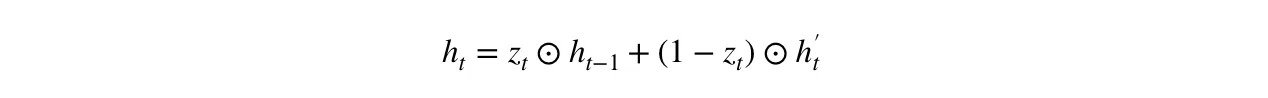

We can use this new hidden state as our output for that time step as well by passing it through a linear activation layer.


# GRU vs LSTM sequence models:

Well, both  were created to solve the vanishing/exploding gradient problem that the standard RNN faces, and both of these RNN variants utilise gating mechanisms to control the flow of long-term and short-term dependencies within the network.

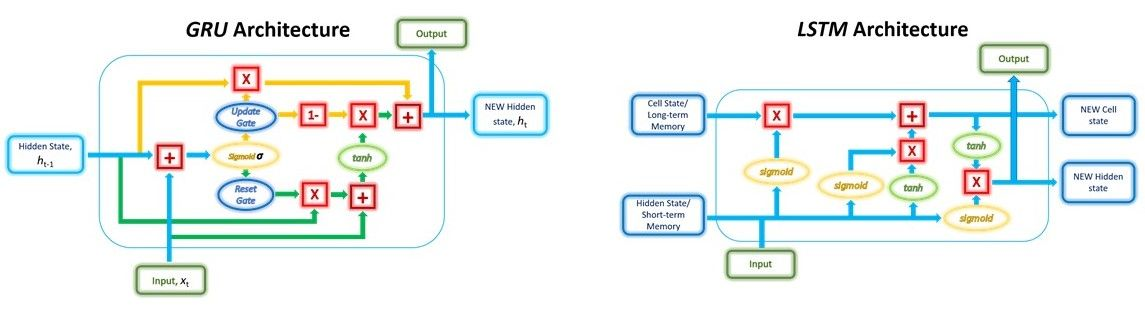
While both GRUs and LSTMs contain gates, the main difference between these two structures lies in the number of gates and their specific roles. The role of the Update gate in the GRU is very similar to the Input and Forget gates in the LSTM. However, the control of new memory content added to the network differs between these two.


1.   Structural Differences

  **In the LSTM,** while the Forget gate determines which part of the previous cell state to retain, the Input gate determines the amount of new memory to be added. These two gates are independent of each other, meaning that the amount of new information added through the Input gate is completely independent of the information retained through the Forget gate.

  **As for the GRU,** the Update gate is responsible for determining which information from the previous memory to retain and is also responsible for controlling the new memory to be added. This means that the retention of previous memory and addition of new information to the memory in the GRU is NOT independent.

  **Another key difference between the structures** is the lack of the cell state in the GRU, as mentioned earlier. While the LSTM stores its longer-term dependencies in the cell state and short-term memory in the hidden state, the GRU stores both in a single hidden state. However, in terms of effectiveness in retaining long-term information, both architectures have been proven to achieve this goal effectively.

2.   Speed Differences

  GRUs are faster to train as compared to LSTMs due to the fewer number of weights and parameters to update during training. This can be attributed to the fewer number of gates in the GRU cell (two gates) as compared to the LSTM’s three gates.

In [ ]:
import tensorflow as tf                                        # tensorflow for modelling
import numpy as np                                             # numpy for math computations
import matplotlib.pyplot as plt                                # visualizations
import sklearn                                                 # scikit-learn
import cv2                                                     # image processing
from sklearn.metrics import confusion_matrix, roc_curve        # metrics
import seaborn as sns                                          # visualizations
import datetime
import pathlib
import io
import os
import re
import string
import time
from numpy import random
import gensim.downloader as api
from PIL import Image
import tensorflow_datasets as tfds
import tensorflow_probability as tfp
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Layer
from tensorflow.keras.layers import (Dense,Flatten,SimpleRNN,InputLayer,Conv1D,Bidirectional,GRU,LSTM,BatchNormalization,Dropout,Input, Embedding,TextVectorization)
from tensorflow.keras.losses import BinaryCrossentropy,CategoricalCrossentropy, SparseCategoricalCrossentropy
from tensorflow.keras.metrics import Accuracy,TopKCategoricalAccuracy, CategoricalAccuracy, SparseCategoricalAccuracy
from tensorflow.keras.optimizers import Adam
from google.colab import drive
from google.colab import files
from tensorboard.plugins import projector
BATCH_SIZE=64

In [ ]:
# Download dataset and split into train, validation and test set.

train_ds,val_ds,test_ds=tfds.load('imdb_reviews', split=['train', 'test[:50%]', 'test[50%:]'],as_supervised=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incomplete6UNJJN/imdb_reviews-train.tfrecord…

Generating test examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incomplete6UNJJN/imdb_reviews-test.tfrecord*…

Generating unsupervised examples...:   0%|          | 0/50000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incomplete6UNJJN/imdb_reviews-unsupervised.t…

Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.


In [ ]:
# investigate few sample of validation set.
# Here in dataset, label 0= negative review & 1=positve review.

for review,label in val_ds.take(5):
  print(review)
  print(label)

tf.Tensor(b"There are films that make careers. For George Romero, it was NIGHT OF THE LIVING DEAD; for Kevin Smith, CLERKS; for Robert Rodriguez, EL MARIACHI. Add to that list Onur Tukel's absolutely amazing DING-A-LING-LESS. Flawless film-making, and as assured and as professional as any of the aforementioned movies. I haven't laughed this hard since I saw THE FULL MONTY. (And, even then, I don't think I laughed quite this hard... So to speak.) Tukel's talent is considerable: DING-A-LING-LESS is so chock full of double entendres that one would have to sit down with a copy of this script and do a line-by-line examination of it to fully appreciate the, uh, breadth and width of it. Every shot is beautifully composed (a clear sign of a sure-handed director), and the performances all around are solid (there's none of the over-the-top scenery chewing one might've expected from a film like this). DING-A-LING-LESS is a film whose time has come.", shape=(), dtype=string)
tf.Tensor(1, shape=(),

In [ ]:
def standardization(input_data):
    '''
    Input: raw reviews
    output: standardized reviews
    '''
    lowercase=tf.strings.lower(input_data)                                             # text will be lowercased.
    no_tag=tf.strings.regex_replace(lowercase,"<[^>]+>","")                            # regex expression for removing html tags.
    output=tf.strings.regex_replace(no_tag,"[%s]"%re.escape(string.punctuation),"")    # all punctuation removed.

    return output

In [ ]:
standardization(tf.constant("<u>In the movie?, </u>man called Raj, went to a friend's pl**ce and they had a tensed discussion. I don't love this movie! would you?<br> <br /><br />T"))

<tf.Tensor: shape=(), dtype=string, numpy=b'in the movie man called raj went to a friends plce and they had a tensed discussion i dont love this movie would you t'>

In [ ]:
# config VOCAB_SIZE, SEQUENCE_LENGTH & EMBEDDING_DIM

VOCAB_SIZE=10000
SEQUENCE_LENGTH=250
EMBEDDING_DIM=300

In [ ]:
# Tensorflow text Vectorization
# Here, arguments -
# max_tokens describes the maximum size of the vocabulary for this layer.
# standardize, whose role is literally to standardize the inputs text, where we could pass customize function, which should do standardization process. So we will be using our own function.
# output_sequence_length, signifies the maximum length of our different sentences.

vectorize_layer=TextVectorization(
    standardize=standardization,
    max_tokens=VOCAB_SIZE,
    output_mode='int',
    output_sequence_length=SEQUENCE_LENGTH
)

In [ ]:
# construct training data
training_data=train_ds.map(lambda x,y:x)  # input x and y and outputx

# create our vocabulary using tensorflow adapt method on our training_data set.
vectorize_layer.adapt(training_data)      # adapt the vectorize_layer to the training data

In [ ]:
# now we would like to check vectorized version of review & label, by passing it inot our vectorize_layer,
# which has been adapted on our full dataset, we will be able to convert this into numbers.

def vectorizer(review,label):
    return vectorize_layer(review),label

In [ ]:
# mapp dataset onto all, which is now vectorized.
train_dataset=train_ds.map(vectorizer)
val_dataset=val_ds.map(vectorizer)

In [ ]:
# Prefetching for more efficient loading of data.

train_dataset=train_dataset.batch(BATCH_SIZE).prefetch(buffer_size=tf.data.AUTOTUNE)
val_dataset=val_dataset.batch(BATCH_SIZE).prefetch(buffer_size=tf.data.AUTOTUNE)

In [ ]:
inputs=np.random.random([32, 10, 8]).astype(np.float32)
simple_rnn=tf.keras.layers.SimpleRNN(25)
output=simple_rnn(inputs)
print(output.shape)

(32, 25)


# GRU (MultiLayer and Bidirectional)

In [ ]:
EMBEDDING_DIM=64
model=tf.keras.models.Sequential([
    Input(shape=(SEQUENCE_LENGTH,)),
    Embedding(VOCAB_SIZE,EMBEDDING_DIM),

    Bidirectional(GRU(64,return_sequences=True)),
    Bidirectional(GRU(32)),

    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1,activation='sigmoid'),
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 250, 64)           640000    
                                                                 
 bidirectional (Bidirectiona  (None, 250, 128)         49920     
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 64)               31104     
 nal)                                                            
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 6

In [ ]:
checkpoint_filepath = '/content/drive/MyDrive/nlp/sentiment_analysis/gru.h5'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

In [ ]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

In [ ]:
history=model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=10,
    callbacks=[])

Epoch 1/10
391/391 [==============================] - 87s 198ms/step - loss: 0.6919 - accuracy: 0.5250 - val_loss: 0.6860 - val_accuracy: 0.5862
Epoch 2/10
391/391 [==============================] - 20s 50ms/step - loss: 0.4691 - accuracy: 0.7748 - val_loss: 0.3386 - val_accuracy: 0.8553
Epoch 3/10
391/391 [==============================] - 20s 51ms/step - loss: 0.2763 - accuracy: 0.8949 - val_loss: 0.3390 - val_accuracy: 0.8582
Epoch 4/10
391/391 [==============================] - 19s 50ms/step - loss: 0.2289 - accuracy: 0.9184 - val_loss: 0.3606 - val_accuracy: 0.8616
Epoch 5/10
391/391 [==============================] - 20s 52ms/step - loss: 0.1987 - accuracy: 0.9314 - val_loss: 0.4420 - val_accuracy: 0.8515
Epoch 6/10
391/391 [==============================] - 19s 48ms/step - loss: 0.1756 - accuracy: 0.9410 - val_loss: 0.4126 - val_accuracy: 0.8529
Epoch 7/10
391/391 [==============================] - 19s 49ms/step - loss: 0.1487 - accuracy: 0.9524 - val_loss: 0.4226 - val_accuracy

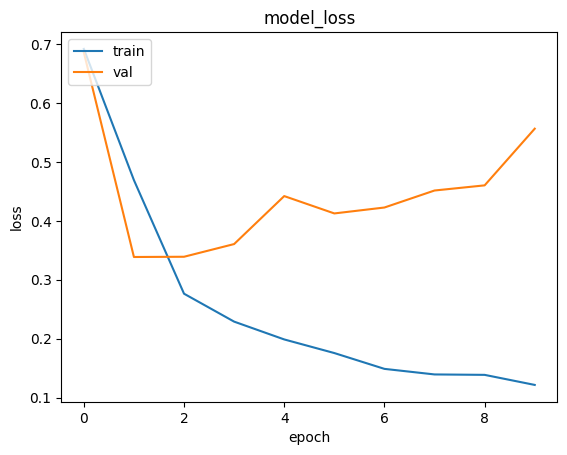

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model_loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

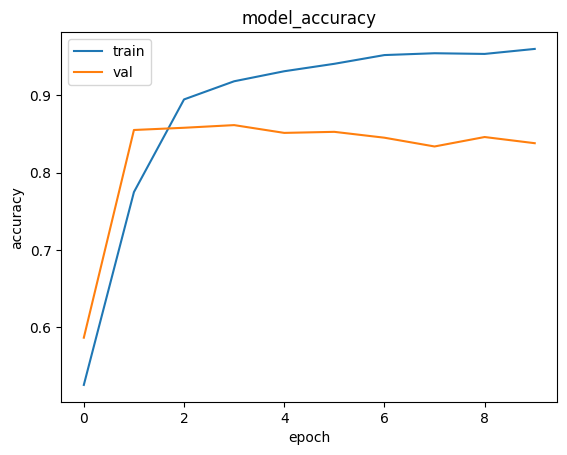

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('model_accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# Evaluation

In [ ]:
test_dataset=test_ds.map(vectorizer)
test_dataset=test_dataset.batch(BATCH_SIZE)
model.evaluate(test_dataset)

196/196 [==============================] - 5s 25ms/step - loss: 0.5398 - accuracy: 0.8419


[0.5397591590881348, 0.841920018196106]

Model evalution results, showing that the GRU is even performs better than the LSTM for this perticular dataset